In [21]:
import numpy as np 
import pandas as pd 
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from keras import initializers
import matplotlib.pyplot as plt
from keras import optimizers
import os
print(os.listdir("../input"))

['coverage.csv']


In [27]:
coverage = pd.read_csv('../input/coverage.csv')
coverage # check coverage information

,Unnamed: 0,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,r
0,t1,1,0,0,0,1,1,0,1,1,1,1
1,t2,1,1,0,1,0,0,0,0,1,0,0
2,t3,1,0,1,0,0,1,1,1,1,1,1
3,t4,1,1,1,1,0,0,1,1,1,0,0
4,t5,1,0,0,0,0,0,0,0,0,0,0
5,t6,1,0,0,0,0,0,0,0,0,0,0
6,t7,1,0,0,0,0,0,0,0,0,0,0
7,t8,1,0,0,0,0,0,0,0,0,0,0
8,t9,0,0,0,0,0,0,0,0,0,0,0
9,t10,1,0,0,0,0,0,0,0,0,0,1


In [34]:
def read_coverage(inputstream):
    coverage = pd.read_csv(inputstream)
    rows, columns = coverage.shape
    m = coverage[coverage.columns[1:-1]]
    m = np.matrix(m)
    result = coverage[coverage.columns[-1]]
    result = np.array(result)
    return m, result, columns-2

In [35]:
#######################################
#           Procedure I               #
#######################################

def get_train_data(): # simulate, example in BPNN paper
    m = np.matrix([
        [1,1,1,1,0,1,0,0,1],
        [1,0,0,0,1,1,1,1,0],
        [0,0,0,0,0,1,1,0,0],
        [1,1,0,0,1,0,1,1,1],
        [1,1,1,0,1,1,1,1,1],
        [0,0,1,0,0,1,1,1,0],
        [1,1,1,1,0,1,0,1,1]
    ]).astype(int)
    result = np.array([0,0,0,0,0,1,1])
    return m, result

def create_virtual_test(n):
    c = np.diag(np.ones(n-1), 1) 
    return c

def build_model(n_statement):
    model = Sequential()
    # input layer is m.size
    # hidden layer one
    initiallizer = initializers.RandomUniform(minval=-0.01*n_statement, maxval=0.01*n_statement, seed=None)
    model.add(Dense(3, input_dim=n_statement, activation='relu', 
                    kernel_initializer= initiallizer,
                    bias_initializer='zeros',
                    kernel_regularizer=regularizers.l2(0.01)))
    # hidden layer 
#     model.add(Dense(3, activation='sigmoid', 
#                     kernel_regularizer=regularizers.l2(0.01)
#                    ))
    # output layer
    model.add(Dense(1, activation='sigmoid'))
    
    return model    


def train_model(m,result,n_statement,epochs):
    model = build_model(n_statement)
    #sgd = optimizers.SGD(lr=0.3, decay=1e-6, momentum=0.9, nesterov=True)
    rmsprop = optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=None, decay=0.0)
    model.compile(loss='binary_crossentropy', optimizer= rmsprop, metrics=['accuracy'])
    history = model.fit(m, result, epochs=epochs) #  batch_size=10

    # summarize history for accuracy
#     plt.plot(history.history['acc'])
#     plt.title('model accuracy')
#     plt.ylabel('accuracy')
#     plt.xlabel('epoch')
#     plt.legend(['train', 'test'], loc='upper left')
#     plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    return model

def selectionSort(rlist):
    index = [x for x in range(len(rlist))]
    rank = [x for x in range(len(rlist))]
    for i in range(len(index)):
        idx = i
        j = i+1
        while j > i and j < len(index):
            if (rlist[idx] < rlist[j]):
                idx = j
            j+=1
        rlist[i],rlist[idx] = swap(rlist[i],rlist[idx])
        index[i], index[idx] = index[idx], index[i]
        i+=1
    return rank, index

def swap(a,b): # just for np.array
    temp = a.copy()
    a = b
    b = temp
    return a, b

#######################################
#           Procedure II              #
#######################################

def find_si(m, result, n_statement):
    si = np.zeros(n_statement)
    for i in range(result.size):
        if result[i] == 0:  
            continue
        for j in range(n_statement):
            if m[i,j] == 0: 
                si[j]-=10000 # assume n_statement < 10000
            else:
                si[j]+=1
    for j in range(n_statement):
        if (si[j] <= 0): si[j] = 0
        else: si[j] = 1
    return si

def find_sm(m, result):
    t = np.zeros(result.size)
    minidx = 0
    minsum = 10000 # assume n_statement < 10000
    for i in range(result.size):
        if result[i] == 0:  
            continue
        t[i] = np.sum(m[i])
        if t[i] < minsum:
            minsum = t[i]
            minidx = i
    sm = m[minidx]
    return sm

def procedure1(r_virtual):
    r_virtual1 = r_virtual.copy()
    rank, index= selectionSort(r_virtual1)
    print("Procedure I")
    for i in range(len(rank)):
        print("Statement {:>2}: {:>4}".format(index[i]+1,rank[i]+1))
        
def procedure2(r_virtual): # improvement suggested in paper
    r_virtual2 = r_virtual.copy()
    print("Procedure II (improvement)")
    # Procedure II
    si = find_si(m,result,n_statement)
    sm = find_sm(m,result)
    for i in range(len(si)):
        if(si[i] != 0 and sm[0,i] != 0):
            r_virtual2[i] +=2.0
            print("Statement {:>2} should be checked firstly (Si)".format(i+1))
        if(si[i] == 0 and sm[0,i] == 1):
            r_virtual2[i] +=1.0
            print("Statement {:>2} should be checked secondly (Sm)".format(i+1))
    rank, index= selectionSort(r_virtual2)
    print("Final Result")
    for i in range(len(rank)):
        print("Statement {:>2}: {:>4}".format(index[i]+1,rank[i]+1))
    

Epoch 1/4500
7/7 [==============================] - 0s 31ms/step - loss: 0.6823 - acc: 0.7143
Epoch 2/4500
7/7 [==============================] - 0s 257us/step - loss: 0.6284 - acc: 0.7143
Epoch 3/4500
7/7 [==============================] - 0s 230us/step - loss: 0.6063 - acc: 0.7143
Epoch 4/4500
7/7 [==============================] - 0s 192us/step - loss: 0.5854 - acc: 0.7143
Epoch 5/4500
7/7 [==============================] - 0s 168us/step - loss: 0.5684 - acc: 0.7143
Epoch 6/4500
7/7 [==============================] - 0s 270us/step - loss: 0.5539 - acc: 0.7143
Epoch 7/4500
7/7 [==============================] - 0s 192us/step - loss: 0.5400 - acc: 0.7143
Epoch 8/4500
7/7 [==============================] - 0s 196us/step - loss: 0.5266 - acc: 0.7143
Epoch 9/4500
7/7 [==============================] - 0s 197us/step - loss: 0.5144 - acc: 0.7143
Epoch 10/4500
7/7 [==============================] - 0s 168us/step - loss: 0.5036 - acc: 0.7143
Epoch 11/4500
7/7 [==============================]

Epoch 87/4500
7/7 [==============================] - 0s 186us/step - loss: 0.1420 - acc: 1.0000
Epoch 88/4500
7/7 [==============================] - 0s 198us/step - loss: 0.1406 - acc: 1.0000
Epoch 89/4500
7/7 [==============================] - 0s 187us/step - loss: 0.1393 - acc: 1.0000
Epoch 90/4500
7/7 [==============================] - 0s 136us/step - loss: 0.1376 - acc: 1.0000
Epoch 91/4500
7/7 [==============================] - 0s 154us/step - loss: 0.1361 - acc: 1.0000
Epoch 92/4500
7/7 [==============================] - 0s 130us/step - loss: 0.1352 - acc: 1.0000
Epoch 93/4500
7/7 [==============================] - 0s 212us/step - loss: 0.1339 - acc: 1.0000
Epoch 94/4500
7/7 [==============================] - 0s 163us/step - loss: 0.1325 - acc: 1.0000
Epoch 95/4500
7/7 [==============================] - 0s 190us/step - loss: 0.1315 - acc: 1.0000
Epoch 96/4500
7/7 [==============================] - 0s 230us/step - loss: 0.1302 - acc: 1.0000
Epoch 97/4500
7/7 [=====================

Epoch 172/4500
7/7 [==============================] - 0s 165us/step - loss: 0.0805 - acc: 1.0000
Epoch 173/4500
7/7 [==============================] - 0s 146us/step - loss: 0.0800 - acc: 1.0000
Epoch 174/4500
7/7 [==============================] - 0s 203us/step - loss: 0.0796 - acc: 1.0000
Epoch 175/4500
7/7 [==============================] - 0s 164us/step - loss: 0.0792 - acc: 1.0000
Epoch 176/4500
7/7 [==============================] - 0s 300us/step - loss: 0.0788 - acc: 1.0000
Epoch 177/4500
7/7 [==============================] - 0s 331us/step - loss: 0.0785 - acc: 1.0000
Epoch 178/4500
7/7 [==============================] - 0s 280us/step - loss: 0.0782 - acc: 1.0000
Epoch 179/4500
7/7 [==============================] - 0s 215us/step - loss: 0.0780 - acc: 1.0000
Epoch 180/4500
7/7 [==============================] - 0s 191us/step - loss: 0.0777 - acc: 1.0000
Epoch 181/4500
7/7 [==============================] - 0s 195us/step - loss: 0.0779 - acc: 1.0000
Epoch 182/4500
7/7 [==========

Epoch 257/4500
7/7 [==============================] - 0s 192us/step - loss: 0.0563 - acc: 1.0000
Epoch 258/4500
7/7 [==============================] - 0s 451us/step - loss: 0.0561 - acc: 1.0000
Epoch 259/4500
7/7 [==============================] - 0s 218us/step - loss: 0.0560 - acc: 1.0000
Epoch 260/4500
7/7 [==============================] - 0s 212us/step - loss: 0.0560 - acc: 1.0000
Epoch 261/4500
7/7 [==============================] - 0s 391us/step - loss: 0.0561 - acc: 1.0000
Epoch 262/4500
7/7 [==============================] - 0s 320us/step - loss: 0.0562 - acc: 1.0000
Epoch 263/4500
7/7 [==============================] - 0s 191us/step - loss: 0.0561 - acc: 1.0000
Epoch 264/4500
7/7 [==============================] - 0s 178us/step - loss: 0.0558 - acc: 1.0000
Epoch 265/4500
7/7 [==============================] - 0s 225us/step - loss: 0.0553 - acc: 1.0000
Epoch 266/4500
7/7 [==============================] - 0s 329us/step - loss: 0.0548 - acc: 1.0000
Epoch 267/4500
7/7 [==========

Epoch 342/4500
7/7 [==============================] - 0s 332us/step - loss: 0.0431 - acc: 1.0000
Epoch 343/4500
7/7 [==============================] - 0s 242us/step - loss: 0.0429 - acc: 1.0000
Epoch 344/4500
7/7 [==============================] - 0s 201us/step - loss: 0.0428 - acc: 1.0000
Epoch 345/4500
7/7 [==============================] - 0s 197us/step - loss: 0.0427 - acc: 1.0000
Epoch 346/4500
7/7 [==============================] - 0s 223us/step - loss: 0.0425 - acc: 1.0000
Epoch 347/4500
7/7 [==============================] - 0s 191us/step - loss: 0.0424 - acc: 1.0000
Epoch 348/4500
7/7 [==============================] - 0s 197us/step - loss: 0.0422 - acc: 1.0000
Epoch 349/4500
7/7 [==============================] - 0s 343us/step - loss: 0.0421 - acc: 1.0000
Epoch 350/4500
7/7 [==============================] - 0s 227us/step - loss: 0.0420 - acc: 1.0000
Epoch 351/4500
7/7 [==============================] - 0s 170us/step - loss: 0.0419 - acc: 1.0000
Epoch 352/4500
7/7 [==========

Epoch 427/4500
7/7 [==============================] - 0s 216us/step - loss: 0.0343 - acc: 1.0000
Epoch 428/4500
7/7 [==============================] - 0s 193us/step - loss: 0.0342 - acc: 1.0000
Epoch 429/4500
7/7 [==============================] - 0s 170us/step - loss: 0.0342 - acc: 1.0000
Epoch 430/4500
7/7 [==============================] - 0s 218us/step - loss: 0.0341 - acc: 1.0000
Epoch 431/4500
7/7 [==============================] - 0s 169us/step - loss: 0.0340 - acc: 1.0000
Epoch 432/4500
7/7 [==============================] - 0s 175us/step - loss: 0.0339 - acc: 1.0000
Epoch 433/4500
7/7 [==============================] - 0s 202us/step - loss: 0.0339 - acc: 1.0000
Epoch 434/4500
7/7 [==============================] - 0s 189us/step - loss: 0.0338 - acc: 1.0000
Epoch 435/4500
7/7 [==============================] - 0s 185us/step - loss: 0.0337 - acc: 1.0000
Epoch 436/4500
7/7 [==============================] - 0s 348us/step - loss: 0.0336 - acc: 1.0000
Epoch 437/4500
7/7 [==========

Epoch 512/4500
7/7 [==============================] - 0s 318us/step - loss: 0.0285 - acc: 1.0000
Epoch 513/4500
7/7 [==============================] - 0s 393us/step - loss: 0.0284 - acc: 1.0000
Epoch 514/4500
7/7 [==============================] - 0s 373us/step - loss: 0.0283 - acc: 1.0000
Epoch 515/4500
7/7 [==============================] - 0s 270us/step - loss: 0.0283 - acc: 1.0000
Epoch 516/4500
7/7 [==============================] - 0s 406us/step - loss: 0.0282 - acc: 1.0000
Epoch 517/4500
7/7 [==============================] - 0s 275us/step - loss: 0.0282 - acc: 1.0000
Epoch 518/4500
7/7 [==============================] - 0s 180us/step - loss: 0.0281 - acc: 1.0000
Epoch 519/4500
7/7 [==============================] - 0s 261us/step - loss: 0.0280 - acc: 1.0000
Epoch 520/4500
7/7 [==============================] - 0s 332us/step - loss: 0.0280 - acc: 1.0000
Epoch 521/4500
7/7 [==============================] - 0s 216us/step - loss: 0.0279 - acc: 1.0000
Epoch 522/4500
7/7 [==========

Epoch 597/4500
7/7 [==============================] - 0s 185us/step - loss: 0.0243 - acc: 1.0000
Epoch 598/4500
7/7 [==============================] - 0s 245us/step - loss: 0.0242 - acc: 1.0000
Epoch 599/4500
7/7 [==============================] - 0s 246us/step - loss: 0.0242 - acc: 1.0000
Epoch 600/4500
7/7 [==============================] - 0s 171us/step - loss: 0.0242 - acc: 1.0000
Epoch 601/4500
7/7 [==============================] - 0s 187us/step - loss: 0.0241 - acc: 1.0000
Epoch 602/4500
7/7 [==============================] - 0s 160us/step - loss: 0.0241 - acc: 1.0000
Epoch 603/4500
7/7 [==============================] - 0s 214us/step - loss: 0.0240 - acc: 1.0000
Epoch 604/4500
7/7 [==============================] - 0s 179us/step - loss: 0.0240 - acc: 1.0000
Epoch 605/4500
7/7 [==============================] - 0s 184us/step - loss: 0.0239 - acc: 1.0000
Epoch 606/4500
7/7 [==============================] - 0s 266us/step - loss: 0.0239 - acc: 1.0000
Epoch 607/4500
7/7 [==========

Epoch 682/4500
7/7 [==============================] - 0s 153us/step - loss: 0.0212 - acc: 1.0000
Epoch 683/4500
7/7 [==============================] - 0s 218us/step - loss: 0.0211 - acc: 1.0000
Epoch 684/4500
7/7 [==============================] - 0s 300us/step - loss: 0.0210 - acc: 1.0000
Epoch 685/4500
7/7 [==============================] - 0s 223us/step - loss: 0.0210 - acc: 1.0000
Epoch 686/4500
7/7 [==============================] - 0s 253us/step - loss: 0.0210 - acc: 1.0000
Epoch 687/4500
7/7 [==============================] - 0s 243us/step - loss: 0.0210 - acc: 1.0000
Epoch 688/4500
7/7 [==============================] - 0s 177us/step - loss: 0.0210 - acc: 1.0000
Epoch 689/4500
7/7 [==============================] - 0s 161us/step - loss: 0.0210 - acc: 1.0000
Epoch 690/4500
7/7 [==============================] - 0s 176us/step - loss: 0.0210 - acc: 1.0000
Epoch 691/4500
7/7 [==============================] - 0s 143us/step - loss: 0.0210 - acc: 1.0000
Epoch 692/4500
7/7 [==========

Epoch 767/4500
7/7 [==============================] - 0s 332us/step - loss: 0.0182 - acc: 1.0000
Epoch 768/4500
7/7 [==============================] - 0s 195us/step - loss: 0.0183 - acc: 1.0000
Epoch 769/4500
7/7 [==============================] - 0s 200us/step - loss: 0.0185 - acc: 1.0000
Epoch 770/4500
7/7 [==============================] - 0s 147us/step - loss: 0.0192 - acc: 1.0000
Epoch 771/4500
7/7 [==============================] - 0s 188us/step - loss: 0.0208 - acc: 1.0000
Epoch 772/4500
7/7 [==============================] - 0s 159us/step - loss: 0.0216 - acc: 1.0000
Epoch 773/4500
7/7 [==============================] - 0s 224us/step - loss: 0.0201 - acc: 1.0000
Epoch 774/4500
7/7 [==============================] - 0s 218us/step - loss: 0.0186 - acc: 1.0000
Epoch 775/4500
7/7 [==============================] - 0s 264us/step - loss: 0.0181 - acc: 1.0000
Epoch 776/4500
7/7 [==============================] - 0s 174us/step - loss: 0.0180 - acc: 1.0000
Epoch 777/4500
7/7 [==========

Epoch 852/4500
7/7 [==============================] - 0s 306us/step - loss: 0.0163 - acc: 1.0000
Epoch 853/4500
7/7 [==============================] - 0s 247us/step - loss: 0.0163 - acc: 1.0000
Epoch 854/4500
7/7 [==============================] - 0s 266us/step - loss: 0.0163 - acc: 1.0000
Epoch 855/4500
7/7 [==============================] - 0s 302us/step - loss: 0.0163 - acc: 1.0000
Epoch 856/4500
7/7 [==============================] - 0s 283us/step - loss: 0.0163 - acc: 1.0000
Epoch 857/4500
7/7 [==============================] - 0s 195us/step - loss: 0.0162 - acc: 1.0000
Epoch 858/4500
7/7 [==============================] - 0s 252us/step - loss: 0.0162 - acc: 1.0000
Epoch 859/4500
7/7 [==============================] - 0s 272us/step - loss: 0.0162 - acc: 1.0000
Epoch 860/4500
7/7 [==============================] - 0s 226us/step - loss: 0.0162 - acc: 1.0000
Epoch 861/4500
7/7 [==============================] - 0s 297us/step - loss: 0.0162 - acc: 1.0000
Epoch 862/4500
7/7 [==========

Epoch 937/4500
7/7 [==============================] - 0s 205us/step - loss: 0.0149 - acc: 1.0000
Epoch 938/4500
7/7 [==============================] - 0s 295us/step - loss: 0.0149 - acc: 1.0000
Epoch 939/4500
7/7 [==============================] - 0s 264us/step - loss: 0.0148 - acc: 1.0000
Epoch 940/4500
7/7 [==============================] - 0s 324us/step - loss: 0.0148 - acc: 1.0000
Epoch 941/4500
7/7 [==============================] - 0s 254us/step - loss: 0.0148 - acc: 1.0000
Epoch 942/4500
7/7 [==============================] - 0s 349us/step - loss: 0.0148 - acc: 1.0000
Epoch 943/4500
7/7 [==============================] - 0s 243us/step - loss: 0.0148 - acc: 1.0000
Epoch 944/4500
7/7 [==============================] - 0s 225us/step - loss: 0.0147 - acc: 1.0000
Epoch 945/4500
7/7 [==============================] - 0s 299us/step - loss: 0.0147 - acc: 1.0000
Epoch 946/4500
7/7 [==============================] - 0s 240us/step - loss: 0.0147 - acc: 1.0000
Epoch 947/4500
7/7 [==========

Epoch 1022/4500
7/7 [==============================] - 0s 367us/step - loss: 0.0148 - acc: 1.0000
Epoch 1023/4500
7/7 [==============================] - 0s 217us/step - loss: 0.0257 - acc: 1.0000
Epoch 1024/4500
7/7 [==============================] - 0s 191us/step - loss: 0.0218 - acc: 1.0000
Epoch 1025/4500
7/7 [==============================] - 0s 195us/step - loss: 0.0144 - acc: 1.0000
Epoch 1026/4500
7/7 [==============================] - 0s 189us/step - loss: 0.0137 - acc: 1.0000
Epoch 1027/4500
7/7 [==============================] - 0s 179us/step - loss: 0.0137 - acc: 1.0000
Epoch 1028/4500
7/7 [==============================] - 0s 199us/step - loss: 0.0137 - acc: 1.0000
Epoch 1029/4500
7/7 [==============================] - 0s 173us/step - loss: 0.0136 - acc: 1.0000
Epoch 1030/4500
7/7 [==============================] - 0s 168us/step - loss: 0.0136 - acc: 1.0000
Epoch 1031/4500
7/7 [==============================] - 0s 169us/step - loss: 0.0136 - acc: 1.0000
Epoch 1032/4500
7/7 

Epoch 1106/4500
7/7 [==============================] - 0s 217us/step - loss: 0.0127 - acc: 1.0000
Epoch 1107/4500
7/7 [==============================] - 0s 192us/step - loss: 0.0128 - acc: 1.0000
Epoch 1108/4500
7/7 [==============================] - 0s 202us/step - loss: 0.0128 - acc: 1.0000
Epoch 1109/4500
7/7 [==============================] - 0s 168us/step - loss: 0.0127 - acc: 1.0000
Epoch 1110/4500
7/7 [==============================] - 0s 184us/step - loss: 0.0127 - acc: 1.0000
Epoch 1111/4500
7/7 [==============================] - 0s 178us/step - loss: 0.0127 - acc: 1.0000
Epoch 1112/4500
7/7 [==============================] - 0s 219us/step - loss: 0.0127 - acc: 1.0000
Epoch 1113/4500
7/7 [==============================] - 0s 246us/step - loss: 0.0127 - acc: 1.0000
Epoch 1114/4500
7/7 [==============================] - 0s 282us/step - loss: 0.0127 - acc: 1.0000
Epoch 1115/4500
7/7 [==============================] - 0s 171us/step - loss: 0.0127 - acc: 1.0000
Epoch 1116/4500
7/7 

Epoch 1190/4500
7/7 [==============================] - 0s 299us/step - loss: 0.0120 - acc: 1.0000
Epoch 1191/4500
7/7 [==============================] - 0s 204us/step - loss: 0.0120 - acc: 1.0000
Epoch 1192/4500
7/7 [==============================] - 0s 338us/step - loss: 0.0120 - acc: 1.0000
Epoch 1193/4500
7/7 [==============================] - 0s 177us/step - loss: 0.0120 - acc: 1.0000
Epoch 1194/4500
7/7 [==============================] - 0s 182us/step - loss: 0.0120 - acc: 1.0000
Epoch 1195/4500
7/7 [==============================] - 0s 212us/step - loss: 0.0119 - acc: 1.0000
Epoch 1196/4500
7/7 [==============================] - 0s 277us/step - loss: 0.0119 - acc: 1.0000
Epoch 1197/4500
7/7 [==============================] - 0s 187us/step - loss: 0.0119 - acc: 1.0000
Epoch 1198/4500
7/7 [==============================] - 0s 208us/step - loss: 0.0119 - acc: 1.0000
Epoch 1199/4500
7/7 [==============================] - 0s 248us/step - loss: 0.0119 - acc: 1.0000
Epoch 1200/4500
7/7 

Epoch 1274/4500
7/7 [==============================] - 0s 326us/step - loss: 0.0113 - acc: 1.0000
Epoch 1275/4500
7/7 [==============================] - 0s 250us/step - loss: 0.0113 - acc: 1.0000
Epoch 1276/4500
7/7 [==============================] - 0s 334us/step - loss: 0.0113 - acc: 1.0000
Epoch 1277/4500
7/7 [==============================] - 0s 375us/step - loss: 0.0113 - acc: 1.0000
Epoch 1278/4500
7/7 [==============================] - 0s 195us/step - loss: 0.0113 - acc: 1.0000
Epoch 1279/4500
7/7 [==============================] - 0s 206us/step - loss: 0.0112 - acc: 1.0000
Epoch 1280/4500
7/7 [==============================] - 0s 262us/step - loss: 0.0112 - acc: 1.0000
Epoch 1281/4500
7/7 [==============================] - 0s 224us/step - loss: 0.0112 - acc: 1.0000
Epoch 1282/4500
7/7 [==============================] - 0s 203us/step - loss: 0.0112 - acc: 1.0000
Epoch 1283/4500
7/7 [==============================] - 0s 217us/step - loss: 0.0112 - acc: 1.0000
Epoch 1284/4500
7/7 

Epoch 1358/4500
7/7 [==============================] - 0s 580us/step - loss: 0.0107 - acc: 1.0000
Epoch 1359/4500
7/7 [==============================] - 0s 191us/step - loss: 0.0107 - acc: 1.0000
Epoch 1360/4500
7/7 [==============================] - 0s 261us/step - loss: 0.0107 - acc: 1.0000
Epoch 1361/4500
7/7 [==============================] - 0s 247us/step - loss: 0.0107 - acc: 1.0000
Epoch 1362/4500
7/7 [==============================] - 0s 177us/step - loss: 0.0107 - acc: 1.0000
Epoch 1363/4500
7/7 [==============================] - 0s 214us/step - loss: 0.0107 - acc: 1.0000
Epoch 1364/4500
7/7 [==============================] - 0s 250us/step - loss: 0.0107 - acc: 1.0000
Epoch 1365/4500
7/7 [==============================] - 0s 165us/step - loss: 0.0107 - acc: 1.0000
Epoch 1366/4500
7/7 [==============================] - 0s 268us/step - loss: 0.0106 - acc: 1.0000
Epoch 1367/4500
7/7 [==============================] - 0s 202us/step - loss: 0.0106 - acc: 1.0000
Epoch 1368/4500
7/7 

Epoch 1442/4500
7/7 [==============================] - 0s 247us/step - loss: 0.0102 - acc: 1.0000
Epoch 1443/4500
7/7 [==============================] - 0s 185us/step - loss: 0.0102 - acc: 1.0000
Epoch 1444/4500
7/7 [==============================] - 0s 215us/step - loss: 0.0102 - acc: 1.0000
Epoch 1445/4500
7/7 [==============================] - 0s 181us/step - loss: 0.0102 - acc: 1.0000
Epoch 1446/4500
7/7 [==============================] - 0s 216us/step - loss: 0.0102 - acc: 1.0000
Epoch 1447/4500
7/7 [==============================] - 0s 444us/step - loss: 0.0102 - acc: 1.0000
Epoch 1448/4500
7/7 [==============================] - 0s 222us/step - loss: 0.0102 - acc: 1.0000
Epoch 1449/4500
7/7 [==============================] - 0s 191us/step - loss: 0.0102 - acc: 1.0000
Epoch 1450/4500
7/7 [==============================] - 0s 196us/step - loss: 0.0102 - acc: 1.0000
Epoch 1451/4500
7/7 [==============================] - 0s 183us/step - loss: 0.0101 - acc: 1.0000
Epoch 1452/4500
7/7 

Epoch 1526/4500
7/7 [==============================] - 0s 301us/step - loss: 0.0098 - acc: 1.0000
Epoch 1527/4500
7/7 [==============================] - 0s 339us/step - loss: 0.0098 - acc: 1.0000
Epoch 1528/4500
7/7 [==============================] - 0s 279us/step - loss: 0.0098 - acc: 1.0000
Epoch 1529/4500
7/7 [==============================] - 0s 261us/step - loss: 0.0098 - acc: 1.0000
Epoch 1530/4500
7/7 [==============================] - 0s 344us/step - loss: 0.0097 - acc: 1.0000
Epoch 1531/4500
7/7 [==============================] - 0s 397us/step - loss: 0.0097 - acc: 1.0000
Epoch 1532/4500
7/7 [==============================] - 0s 375us/step - loss: 0.0097 - acc: 1.0000
Epoch 1533/4500
7/7 [==============================] - 0s 364us/step - loss: 0.0097 - acc: 1.0000
Epoch 1534/4500
7/7 [==============================] - 0s 310us/step - loss: 0.0097 - acc: 1.0000
Epoch 1535/4500
7/7 [==============================] - 0s 314us/step - loss: 0.0097 - acc: 1.0000
Epoch 1536/4500
7/7 

Epoch 1610/4500
7/7 [==============================] - 0s 339us/step - loss: 0.0094 - acc: 1.0000
Epoch 1611/4500
7/7 [==============================] - 0s 220us/step - loss: 0.0094 - acc: 1.0000
Epoch 1612/4500
7/7 [==============================] - 0s 164us/step - loss: 0.0094 - acc: 1.0000
Epoch 1613/4500
7/7 [==============================] - 0s 286us/step - loss: 0.0094 - acc: 1.0000
Epoch 1614/4500
7/7 [==============================] - 0s 284us/step - loss: 0.0094 - acc: 1.0000
Epoch 1615/4500
7/7 [==============================] - 0s 255us/step - loss: 0.0094 - acc: 1.0000
Epoch 1616/4500
7/7 [==============================] - 0s 207us/step - loss: 0.0094 - acc: 1.0000
Epoch 1617/4500
7/7 [==============================] - 0s 264us/step - loss: 0.0094 - acc: 1.0000
Epoch 1618/4500
7/7 [==============================] - 0s 293us/step - loss: 0.0093 - acc: 1.0000
Epoch 1619/4500
7/7 [==============================] - 0s 170us/step - loss: 0.0093 - acc: 1.0000
Epoch 1620/4500
7/7 

Epoch 1694/4500
7/7 [==============================] - 0s 347us/step - loss: 0.0090 - acc: 1.0000
Epoch 1695/4500
7/7 [==============================] - 0s 336us/step - loss: 0.0090 - acc: 1.0000
Epoch 1696/4500
7/7 [==============================] - 0s 364us/step - loss: 0.0090 - acc: 1.0000
Epoch 1697/4500
7/7 [==============================] - 0s 358us/step - loss: 0.0090 - acc: 1.0000
Epoch 1698/4500
7/7 [==============================] - 0s 369us/step - loss: 0.0090 - acc: 1.0000
Epoch 1699/4500
7/7 [==============================] - 0s 372us/step - loss: 0.0090 - acc: 1.0000
Epoch 1700/4500
7/7 [==============================] - 0s 365us/step - loss: 0.0090 - acc: 1.0000
Epoch 1701/4500
7/7 [==============================] - 0s 340us/step - loss: 0.0090 - acc: 1.0000
Epoch 1702/4500
7/7 [==============================] - 0s 330us/step - loss: 0.0090 - acc: 1.0000
Epoch 1703/4500
7/7 [==============================] - 0s 358us/step - loss: 0.0090 - acc: 1.0000
Epoch 1704/4500
7/7 

Epoch 1778/4500
7/7 [==============================] - 0s 203us/step - loss: 0.0219 - acc: 1.0000
Epoch 1779/4500
7/7 [==============================] - 0s 221us/step - loss: 0.0100 - acc: 1.0000
Epoch 1780/4500
7/7 [==============================] - 0s 326us/step - loss: 0.0091 - acc: 1.0000
Epoch 1781/4500
7/7 [==============================] - 0s 250us/step - loss: 0.0089 - acc: 1.0000
Epoch 1782/4500
7/7 [==============================] - 0s 152us/step - loss: 0.0088 - acc: 1.0000
Epoch 1783/4500
7/7 [==============================] - 0s 279us/step - loss: 0.0088 - acc: 1.0000
Epoch 1784/4500
7/7 [==============================] - 0s 178us/step - loss: 0.0088 - acc: 1.0000
Epoch 1785/4500
7/7 [==============================] - 0s 205us/step - loss: 0.0088 - acc: 1.0000
Epoch 1786/4500
7/7 [==============================] - 0s 268us/step - loss: 0.0087 - acc: 1.0000
Epoch 1787/4500
7/7 [==============================] - 0s 223us/step - loss: 0.0087 - acc: 1.0000
Epoch 1788/4500
7/7 

Epoch 1862/4500
7/7 [==============================] - 0s 255us/step - loss: 0.0084 - acc: 1.0000
Epoch 1863/4500
7/7 [==============================] - 0s 330us/step - loss: 0.0084 - acc: 1.0000
Epoch 1864/4500
7/7 [==============================] - 0s 312us/step - loss: 0.0085 - acc: 1.0000
Epoch 1865/4500
7/7 [==============================] - 0s 226us/step - loss: 0.0105 - acc: 1.0000
Epoch 1866/4500
7/7 [==============================] - 0s 164us/step - loss: 0.0387 - acc: 1.0000
Epoch 1867/4500
7/7 [==============================] - 0s 452us/step - loss: 0.0149 - acc: 1.0000
Epoch 1868/4500
7/7 [==============================] - 0s 315us/step - loss: 0.0090 - acc: 1.0000
Epoch 1869/4500
7/7 [==============================] - 0s 220us/step - loss: 0.0087 - acc: 1.0000
Epoch 1870/4500
7/7 [==============================] - 0s 381us/step - loss: 0.0086 - acc: 1.0000
Epoch 1871/4500
7/7 [==============================] - 0s 362us/step - loss: 0.0085 - acc: 1.0000
Epoch 1872/4500
7/7 

Epoch 1946/4500
7/7 [==============================] - 0s 217us/step - loss: 0.0082 - acc: 1.0000
Epoch 1947/4500
7/7 [==============================] - 0s 238us/step - loss: 0.0082 - acc: 1.0000
Epoch 1948/4500
7/7 [==============================] - 0s 226us/step - loss: 0.0082 - acc: 1.0000
Epoch 1949/4500
7/7 [==============================] - 0s 335us/step - loss: 0.0081 - acc: 1.0000
Epoch 1950/4500
7/7 [==============================] - 0s 248us/step - loss: 0.0081 - acc: 1.0000
Epoch 1951/4500
7/7 [==============================] - 0s 259us/step - loss: 0.0081 - acc: 1.0000
Epoch 1952/4500
7/7 [==============================] - 0s 263us/step - loss: 0.0081 - acc: 1.0000
Epoch 1953/4500
7/7 [==============================] - 0s 175us/step - loss: 0.0081 - acc: 1.0000
Epoch 1954/4500
7/7 [==============================] - 0s 433us/step - loss: 0.0081 - acc: 1.0000
Epoch 1955/4500
7/7 [==============================] - 0s 213us/step - loss: 0.0081 - acc: 1.0000
Epoch 1956/4500
7/7 

Epoch 2030/4500
7/7 [==============================] - 0s 286us/step - loss: 0.0080 - acc: 1.0000
Epoch 2031/4500
7/7 [==============================] - 0s 186us/step - loss: 0.0079 - acc: 1.0000
Epoch 2032/4500
7/7 [==============================] - 0s 211us/step - loss: 0.0079 - acc: 1.0000
Epoch 2033/4500
7/7 [==============================] - 0s 270us/step - loss: 0.0079 - acc: 1.0000
Epoch 2034/4500
7/7 [==============================] - 0s 191us/step - loss: 0.0079 - acc: 1.0000
Epoch 2035/4500
7/7 [==============================] - 0s 178us/step - loss: 0.0079 - acc: 1.0000
Epoch 2036/4500
7/7 [==============================] - 0s 345us/step - loss: 0.0079 - acc: 1.0000
Epoch 2037/4500
7/7 [==============================] - 0s 170us/step - loss: 0.0079 - acc: 1.0000
Epoch 2038/4500
7/7 [==============================] - 0s 190us/step - loss: 0.0079 - acc: 1.0000
Epoch 2039/4500
7/7 [==============================] - 0s 200us/step - loss: 0.0079 - acc: 1.0000
Epoch 2040/4500
7/7 

Epoch 2114/4500
7/7 [==============================] - 0s 265us/step - loss: 0.0078 - acc: 1.0000
Epoch 2115/4500
7/7 [==============================] - 0s 194us/step - loss: 0.0078 - acc: 1.0000
Epoch 2116/4500
7/7 [==============================] - 0s 238us/step - loss: 0.0077 - acc: 1.0000
Epoch 2117/4500
7/7 [==============================] - 0s 276us/step - loss: 0.0077 - acc: 1.0000
Epoch 2118/4500
7/7 [==============================] - 0s 250us/step - loss: 0.0077 - acc: 1.0000
Epoch 2119/4500
7/7 [==============================] - 0s 243us/step - loss: 0.0077 - acc: 1.0000
Epoch 2120/4500
7/7 [==============================] - 0s 237us/step - loss: 0.0077 - acc: 1.0000
Epoch 2121/4500
7/7 [==============================] - 0s 411us/step - loss: 0.0077 - acc: 1.0000
Epoch 2122/4500
7/7 [==============================] - 0s 175us/step - loss: 0.0077 - acc: 1.0000
Epoch 2123/4500
7/7 [==============================] - 0s 298us/step - loss: 0.0077 - acc: 1.0000
Epoch 2124/4500
7/7 

Epoch 2198/4500
7/7 [==============================] - 0s 138us/step - loss: 0.0075 - acc: 1.0000
Epoch 2199/4500
7/7 [==============================] - 0s 170us/step - loss: 0.0075 - acc: 1.0000
Epoch 2200/4500
7/7 [==============================] - 0s 195us/step - loss: 0.0075 - acc: 1.0000
Epoch 2201/4500
7/7 [==============================] - 0s 187us/step - loss: 0.0075 - acc: 1.0000
Epoch 2202/4500
7/7 [==============================] - 0s 169us/step - loss: 0.0075 - acc: 1.0000
Epoch 2203/4500
7/7 [==============================] - 0s 174us/step - loss: 0.0076 - acc: 1.0000
Epoch 2204/4500
7/7 [==============================] - 0s 155us/step - loss: 0.0086 - acc: 1.0000
Epoch 2205/4500
7/7 [==============================] - 0s 164us/step - loss: 0.0257 - acc: 1.0000
Epoch 2206/4500
7/7 [==============================] - 0s 179us/step - loss: 0.0254 - acc: 1.0000
Epoch 2207/4500
7/7 [==============================] - 0s 174us/step - loss: 0.0092 - acc: 1.0000
Epoch 2208/4500
7/7 

Epoch 2282/4500
7/7 [==============================] - 0s 186us/step - loss: 0.0074 - acc: 1.0000
Epoch 2283/4500
7/7 [==============================] - 0s 189us/step - loss: 0.0073 - acc: 1.0000
Epoch 2284/4500
7/7 [==============================] - 0s 211us/step - loss: 0.0073 - acc: 1.0000
Epoch 2285/4500
7/7 [==============================] - 0s 153us/step - loss: 0.0073 - acc: 1.0000
Epoch 2286/4500
7/7 [==============================] - 0s 185us/step - loss: 0.0073 - acc: 1.0000
Epoch 2287/4500
7/7 [==============================] - 0s 190us/step - loss: 0.0073 - acc: 1.0000
Epoch 2288/4500
7/7 [==============================] - 0s 168us/step - loss: 0.0073 - acc: 1.0000
Epoch 2289/4500
7/7 [==============================] - 0s 170us/step - loss: 0.0073 - acc: 1.0000
Epoch 2290/4500
7/7 [==============================] - 0s 157us/step - loss: 0.0073 - acc: 1.0000
Epoch 2291/4500
7/7 [==============================] - 0s 211us/step - loss: 0.0073 - acc: 1.0000
Epoch 2292/4500
7/7 

Epoch 2366/4500
7/7 [==============================] - 0s 282us/step - loss: 0.0073 - acc: 1.0000
Epoch 2367/4500
7/7 [==============================] - 0s 219us/step - loss: 0.0072 - acc: 1.0000
Epoch 2368/4500
7/7 [==============================] - 0s 210us/step - loss: 0.0072 - acc: 1.0000
Epoch 2369/4500
7/7 [==============================] - 0s 201us/step - loss: 0.0072 - acc: 1.0000
Epoch 2370/4500
7/7 [==============================] - 0s 279us/step - loss: 0.0072 - acc: 1.0000
Epoch 2371/4500
7/7 [==============================] - 0s 179us/step - loss: 0.0072 - acc: 1.0000
Epoch 2372/4500
7/7 [==============================] - 0s 370us/step - loss: 0.0072 - acc: 1.0000
Epoch 2373/4500
7/7 [==============================] - 0s 200us/step - loss: 0.0072 - acc: 1.0000
Epoch 2374/4500
7/7 [==============================] - 0s 272us/step - loss: 0.0072 - acc: 1.0000
Epoch 2375/4500
7/7 [==============================] - 0s 185us/step - loss: 0.0072 - acc: 1.0000
Epoch 2376/4500
7/7 

Epoch 2450/4500
7/7 [==============================] - 0s 305us/step - loss: 0.0070 - acc: 1.0000
Epoch 2451/4500
7/7 [==============================] - 0s 217us/step - loss: 0.0070 - acc: 1.0000
Epoch 2452/4500
7/7 [==============================] - 0s 152us/step - loss: 0.0070 - acc: 1.0000
Epoch 2453/4500
7/7 [==============================] - 0s 351us/step - loss: 0.0070 - acc: 1.0000
Epoch 2454/4500
7/7 [==============================] - 0s 161us/step - loss: 0.0070 - acc: 1.0000
Epoch 2455/4500
7/7 [==============================] - 0s 180us/step - loss: 0.0070 - acc: 1.0000
Epoch 2456/4500
7/7 [==============================] - 0s 210us/step - loss: 0.0070 - acc: 1.0000
Epoch 2457/4500
7/7 [==============================] - 0s 169us/step - loss: 0.0070 - acc: 1.0000
Epoch 2458/4500
7/7 [==============================] - 0s 273us/step - loss: 0.0070 - acc: 1.0000
Epoch 2459/4500
7/7 [==============================] - 0s 224us/step - loss: 0.0070 - acc: 1.0000
Epoch 2460/4500
7/7 

Epoch 2534/4500
7/7 [==============================] - 0s 431us/step - loss: 0.0069 - acc: 1.0000
Epoch 2535/4500
7/7 [==============================] - 0s 300us/step - loss: 0.0069 - acc: 1.0000
Epoch 2536/4500
7/7 [==============================] - 0s 232us/step - loss: 0.0069 - acc: 1.0000
Epoch 2537/4500
7/7 [==============================] - 0s 486us/step - loss: 0.0069 - acc: 1.0000
Epoch 2538/4500
7/7 [==============================] - 0s 396us/step - loss: 0.0069 - acc: 1.0000
Epoch 2539/4500
7/7 [==============================] - 0s 338us/step - loss: 0.0069 - acc: 1.0000
Epoch 2540/4500
7/7 [==============================] - 0s 212us/step - loss: 0.0069 - acc: 1.0000
Epoch 2541/4500
7/7 [==============================] - 0s 219us/step - loss: 0.0069 - acc: 1.0000
Epoch 2542/4500
7/7 [==============================] - 0s 216us/step - loss: 0.0069 - acc: 1.0000
Epoch 2543/4500
7/7 [==============================] - 0s 204us/step - loss: 0.0069 - acc: 1.0000
Epoch 2544/4500
7/7 

Epoch 2618/4500
7/7 [==============================] - 0s 177us/step - loss: 0.0067 - acc: 1.0000
Epoch 2619/4500
7/7 [==============================] - 0s 267us/step - loss: 0.0067 - acc: 1.0000
Epoch 2620/4500
7/7 [==============================] - 0s 323us/step - loss: 0.0071 - acc: 1.0000
Epoch 2621/4500
7/7 [==============================] - 0s 247us/step - loss: 0.0127 - acc: 1.0000
Epoch 2622/4500
7/7 [==============================] - 0s 244us/step - loss: 0.0496 - acc: 1.0000
Epoch 2623/4500
7/7 [==============================] - 0s 235us/step - loss: 0.0145 - acc: 1.0000
Epoch 2624/4500
7/7 [==============================] - 0s 270us/step - loss: 0.0075 - acc: 1.0000
Epoch 2625/4500
7/7 [==============================] - 0s 278us/step - loss: 0.0072 - acc: 1.0000
Epoch 2626/4500
7/7 [==============================] - 0s 263us/step - loss: 0.0070 - acc: 1.0000
Epoch 2627/4500
7/7 [==============================] - 0s 247us/step - loss: 0.0069 - acc: 1.0000
Epoch 2628/4500
7/7 

Epoch 2702/4500
7/7 [==============================] - 0s 241us/step - loss: 0.0066 - acc: 1.0000
Epoch 2703/4500
7/7 [==============================] - 0s 289us/step - loss: 0.0066 - acc: 1.0000
Epoch 2704/4500
7/7 [==============================] - 0s 321us/step - loss: 0.0066 - acc: 1.0000
Epoch 2705/4500
7/7 [==============================] - 0s 195us/step - loss: 0.0066 - acc: 1.0000
Epoch 2706/4500
7/7 [==============================] - 0s 217us/step - loss: 0.0066 - acc: 1.0000
Epoch 2707/4500
7/7 [==============================] - 0s 183us/step - loss: 0.0066 - acc: 1.0000
Epoch 2708/4500
7/7 [==============================] - 0s 304us/step - loss: 0.0066 - acc: 1.0000
Epoch 2709/4500
7/7 [==============================] - 0s 238us/step - loss: 0.0066 - acc: 1.0000
Epoch 2710/4500
7/7 [==============================] - 0s 185us/step - loss: 0.0066 - acc: 1.0000
Epoch 2711/4500
7/7 [==============================] - 0s 190us/step - loss: 0.0066 - acc: 1.0000
Epoch 2712/4500
7/7 

Epoch 2786/4500
7/7 [==============================] - 0s 195us/step - loss: 0.0064 - acc: 1.0000
Epoch 2787/4500
7/7 [==============================] - 0s 386us/step - loss: 0.0064 - acc: 1.0000
Epoch 2788/4500
7/7 [==============================] - 0s 218us/step - loss: 0.0064 - acc: 1.0000
Epoch 2789/4500
7/7 [==============================] - 0s 272us/step - loss: 0.0065 - acc: 1.0000
Epoch 2790/4500
7/7 [==============================] - 0s 339us/step - loss: 0.0096 - acc: 1.0000
Epoch 2791/4500
7/7 [==============================] - 0s 182us/step - loss: 0.0737 - acc: 1.0000
Epoch 2792/4500
7/7 [==============================] - 0s 170us/step - loss: 0.0126 - acc: 1.0000
Epoch 2793/4500
7/7 [==============================] - 0s 184us/step - loss: 0.0081 - acc: 1.0000
Epoch 2794/4500
7/7 [==============================] - 0s 202us/step - loss: 0.0074 - acc: 1.0000
Epoch 2795/4500
7/7 [==============================] - 0s 188us/step - loss: 0.0070 - acc: 1.0000
Epoch 2796/4500
7/7 

Epoch 2870/4500
7/7 [==============================] - 0s 241us/step - loss: 0.0064 - acc: 1.0000
Epoch 2871/4500
7/7 [==============================] - 0s 170us/step - loss: 0.0064 - acc: 1.0000
Epoch 2872/4500
7/7 [==============================] - 0s 205us/step - loss: 0.0064 - acc: 1.0000
Epoch 2873/4500
7/7 [==============================] - 0s 198us/step - loss: 0.0064 - acc: 1.0000
Epoch 2874/4500
7/7 [==============================] - 0s 158us/step - loss: 0.0064 - acc: 1.0000
Epoch 2875/4500
7/7 [==============================] - 0s 178us/step - loss: 0.0064 - acc: 1.0000
Epoch 2876/4500
7/7 [==============================] - 0s 320us/step - loss: 0.0064 - acc: 1.0000
Epoch 2877/4500
7/7 [==============================] - 0s 258us/step - loss: 0.0064 - acc: 1.0000
Epoch 2878/4500
7/7 [==============================] - 0s 190us/step - loss: 0.0064 - acc: 1.0000
Epoch 2879/4500
7/7 [==============================] - 0s 221us/step - loss: 0.0064 - acc: 1.0000
Epoch 2880/4500
7/7 

Epoch 2954/4500
7/7 [==============================] - 0s 234us/step - loss: 0.0062 - acc: 1.0000
Epoch 2955/4500
7/7 [==============================] - 0s 185us/step - loss: 0.0062 - acc: 1.0000
Epoch 2956/4500
7/7 [==============================] - 0s 359us/step - loss: 0.0062 - acc: 1.0000
Epoch 2957/4500
7/7 [==============================] - 0s 210us/step - loss: 0.0062 - acc: 1.0000
Epoch 2958/4500
7/7 [==============================] - 0s 390us/step - loss: 0.0062 - acc: 1.0000
Epoch 2959/4500
7/7 [==============================] - 0s 293us/step - loss: 0.0062 - acc: 1.0000
Epoch 2960/4500
7/7 [==============================] - 0s 213us/step - loss: 0.0063 - acc: 1.0000
Epoch 2961/4500
7/7 [==============================] - 0s 236us/step - loss: 0.0067 - acc: 1.0000
Epoch 2962/4500
7/7 [==============================] - 0s 235us/step - loss: 0.0165 - acc: 1.0000
Epoch 2963/4500
7/7 [==============================] - 0s 224us/step - loss: 0.0463 - acc: 1.0000
Epoch 2964/4500
7/7 

Epoch 3038/4500
7/7 [==============================] - 0s 172us/step - loss: 0.0062 - acc: 1.0000
Epoch 3039/4500
7/7 [==============================] - 0s 249us/step - loss: 0.0062 - acc: 1.0000
Epoch 3040/4500
7/7 [==============================] - 0s 204us/step - loss: 0.0062 - acc: 1.0000
Epoch 3041/4500
7/7 [==============================] - 0s 192us/step - loss: 0.0062 - acc: 1.0000
Epoch 3042/4500
7/7 [==============================] - 0s 197us/step - loss: 0.0062 - acc: 1.0000
Epoch 3043/4500
7/7 [==============================] - 0s 328us/step - loss: 0.0062 - acc: 1.0000
Epoch 3044/4500
7/7 [==============================] - 0s 164us/step - loss: 0.0062 - acc: 1.0000
Epoch 3045/4500
7/7 [==============================] - 0s 285us/step - loss: 0.0061 - acc: 1.0000
Epoch 3046/4500
7/7 [==============================] - 0s 251us/step - loss: 0.0061 - acc: 1.0000
Epoch 3047/4500
7/7 [==============================] - 0s 209us/step - loss: 0.0061 - acc: 1.0000
Epoch 3048/4500
7/7 

Epoch 3122/4500
7/7 [==============================] - 0s 177us/step - loss: 0.0060 - acc: 1.0000
Epoch 3123/4500
7/7 [==============================] - 0s 369us/step - loss: 0.0060 - acc: 1.0000
Epoch 3124/4500
7/7 [==============================] - 0s 266us/step - loss: 0.0060 - acc: 1.0000
Epoch 3125/4500
7/7 [==============================] - 0s 271us/step - loss: 0.0060 - acc: 1.0000
Epoch 3126/4500
7/7 [==============================] - 0s 184us/step - loss: 0.0060 - acc: 1.0000
Epoch 3127/4500
7/7 [==============================] - 0s 171us/step - loss: 0.0060 - acc: 1.0000
Epoch 3128/4500
7/7 [==============================] - 0s 269us/step - loss: 0.0060 - acc: 1.0000
Epoch 3129/4500
7/7 [==============================] - 0s 457us/step - loss: 0.0061 - acc: 1.0000
Epoch 3130/4500
7/7 [==============================] - 0s 392us/step - loss: 0.0074 - acc: 1.0000
Epoch 3131/4500
7/7 [==============================] - 0s 313us/step - loss: 0.0404 - acc: 1.0000
Epoch 3132/4500
7/7 

Epoch 3206/4500
7/7 [==============================] - 0s 269us/step - loss: 0.0060 - acc: 1.0000
Epoch 3207/4500
7/7 [==============================] - 0s 461us/step - loss: 0.0060 - acc: 1.0000
Epoch 3208/4500
7/7 [==============================] - 0s 202us/step - loss: 0.0060 - acc: 1.0000
Epoch 3209/4500
7/7 [==============================] - 0s 166us/step - loss: 0.0060 - acc: 1.0000
Epoch 3210/4500
7/7 [==============================] - 0s 351us/step - loss: 0.0060 - acc: 1.0000
Epoch 3211/4500
7/7 [==============================] - 0s 238us/step - loss: 0.0060 - acc: 1.0000
Epoch 3212/4500
7/7 [==============================] - 0s 200us/step - loss: 0.0060 - acc: 1.0000
Epoch 3213/4500
7/7 [==============================] - 0s 384us/step - loss: 0.0060 - acc: 1.0000
Epoch 3214/4500
7/7 [==============================] - 0s 282us/step - loss: 0.0060 - acc: 1.0000
Epoch 3215/4500
7/7 [==============================] - 0s 279us/step - loss: 0.0060 - acc: 1.0000
Epoch 3216/4500
7/7 

Epoch 3290/4500
7/7 [==============================] - 0s 296us/step - loss: 0.0058 - acc: 1.0000
Epoch 3291/4500
7/7 [==============================] - 0s 209us/step - loss: 0.0058 - acc: 1.0000
Epoch 3292/4500
7/7 [==============================] - 0s 227us/step - loss: 0.0058 - acc: 1.0000
Epoch 3293/4500
7/7 [==============================] - 0s 201us/step - loss: 0.0058 - acc: 1.0000
Epoch 3294/4500
7/7 [==============================] - 0s 299us/step - loss: 0.0059 - acc: 1.0000
Epoch 3295/4500
7/7 [==============================] - 0s 312us/step - loss: 0.0063 - acc: 1.0000
Epoch 3296/4500
7/7 [==============================] - 0s 336us/step - loss: 0.0155 - acc: 1.0000
Epoch 3297/4500
7/7 [==============================] - 0s 270us/step - loss: 0.0473 - acc: 1.0000
Epoch 3298/4500
7/7 [==============================] - 0s 217us/step - loss: 0.0138 - acc: 1.0000
Epoch 3299/4500
7/7 [==============================] - 0s 234us/step - loss: 0.0066 - acc: 1.0000
Epoch 3300/4500
7/7 

Epoch 3374/4500
7/7 [==============================] - 0s 263us/step - loss: 0.0058 - acc: 1.0000
Epoch 3375/4500
7/7 [==============================] - 0s 262us/step - loss: 0.0058 - acc: 1.0000
Epoch 3376/4500
7/7 [==============================] - 0s 242us/step - loss: 0.0058 - acc: 1.0000
Epoch 3377/4500
7/7 [==============================] - 0s 268us/step - loss: 0.0058 - acc: 1.0000
Epoch 3378/4500
7/7 [==============================] - 0s 260us/step - loss: 0.0058 - acc: 1.0000
Epoch 3379/4500
7/7 [==============================] - 0s 299us/step - loss: 0.0058 - acc: 1.0000
Epoch 3380/4500
7/7 [==============================] - 0s 274us/step - loss: 0.0058 - acc: 1.0000
Epoch 3381/4500
7/7 [==============================] - 0s 280us/step - loss: 0.0058 - acc: 1.0000
Epoch 3382/4500
7/7 [==============================] - 0s 198us/step - loss: 0.0058 - acc: 1.0000
Epoch 3383/4500
7/7 [==============================] - 0s 134us/step - loss: 0.0058 - acc: 1.0000
Epoch 3384/4500
7/7 

Epoch 3458/4500
7/7 [==============================] - 0s 232us/step - loss: 0.0057 - acc: 1.0000
Epoch 3459/4500
7/7 [==============================] - 0s 218us/step - loss: 0.0057 - acc: 1.0000
Epoch 3460/4500
7/7 [==============================] - 0s 202us/step - loss: 0.0057 - acc: 1.0000
Epoch 3461/4500
7/7 [==============================] - 0s 383us/step - loss: 0.0057 - acc: 1.0000
Epoch 3462/4500
7/7 [==============================] - 0s 260us/step - loss: 0.0057 - acc: 1.0000
Epoch 3463/4500
7/7 [==============================] - 0s 210us/step - loss: 0.0057 - acc: 1.0000
Epoch 3464/4500
7/7 [==============================] - 0s 478us/step - loss: 0.0057 - acc: 1.0000
Epoch 3465/4500
7/7 [==============================] - 0s 533us/step - loss: 0.0057 - acc: 1.0000
Epoch 3466/4500
7/7 [==============================] - 0s 241us/step - loss: 0.0057 - acc: 1.0000
Epoch 3467/4500
7/7 [==============================] - 0s 367us/step - loss: 0.0057 - acc: 1.0000
Epoch 3468/4500
7/7 

Epoch 3542/4500
7/7 [==============================] - 0s 194us/step - loss: 0.0057 - acc: 1.0000
Epoch 3543/4500
7/7 [==============================] - 0s 419us/step - loss: 0.0057 - acc: 1.0000
Epoch 3544/4500
7/7 [==============================] - 0s 425us/step - loss: 0.0057 - acc: 1.0000
Epoch 3545/4500
7/7 [==============================] - 0s 233us/step - loss: 0.0057 - acc: 1.0000
Epoch 3546/4500
7/7 [==============================] - 0s 244us/step - loss: 0.0057 - acc: 1.0000
Epoch 3547/4500
7/7 [==============================] - 0s 221us/step - loss: 0.0057 - acc: 1.0000
Epoch 3548/4500
7/7 [==============================] - 0s 181us/step - loss: 0.0056 - acc: 1.0000
Epoch 3549/4500
7/7 [==============================] - 0s 176us/step - loss: 0.0056 - acc: 1.0000
Epoch 3550/4500
7/7 [==============================] - 0s 271us/step - loss: 0.0056 - acc: 1.0000
Epoch 3551/4500
7/7 [==============================] - 0s 241us/step - loss: 0.0056 - acc: 1.0000
Epoch 3552/4500
7/7 

Epoch 3626/4500
7/7 [==============================] - 0s 215us/step - loss: 0.0055 - acc: 1.0000
Epoch 3627/4500
7/7 [==============================] - 0s 371us/step - loss: 0.0055 - acc: 1.0000
Epoch 3628/4500
7/7 [==============================] - 0s 267us/step - loss: 0.0055 - acc: 1.0000
Epoch 3629/4500
7/7 [==============================] - 0s 173us/step - loss: 0.0055 - acc: 1.0000
Epoch 3630/4500
7/7 [==============================] - 0s 215us/step - loss: 0.0055 - acc: 1.0000
Epoch 3631/4500
7/7 [==============================] - 0s 178us/step - loss: 0.0055 - acc: 1.0000
Epoch 3632/4500
7/7 [==============================] - 0s 365us/step - loss: 0.0055 - acc: 1.0000
Epoch 3633/4500
7/7 [==============================] - 0s 236us/step - loss: 0.0055 - acc: 1.0000
Epoch 3634/4500
7/7 [==============================] - 0s 384us/step - loss: 0.0055 - acc: 1.0000
Epoch 3635/4500
7/7 [==============================] - 0s 196us/step - loss: 0.0055 - acc: 1.0000
Epoch 3636/4500
7/7 

Epoch 3710/4500
7/7 [==============================] - 0s 199us/step - loss: 0.0058 - acc: 1.0000
Epoch 3711/4500
7/7 [==============================] - 0s 263us/step - loss: 0.0058 - acc: 1.0000
Epoch 3712/4500
7/7 [==============================] - 0s 210us/step - loss: 0.0057 - acc: 1.0000
Epoch 3713/4500
7/7 [==============================] - 0s 293us/step - loss: 0.0057 - acc: 1.0000
Epoch 3714/4500
7/7 [==============================] - 0s 323us/step - loss: 0.0056 - acc: 1.0000
Epoch 3715/4500
7/7 [==============================] - 0s 170us/step - loss: 0.0056 - acc: 1.0000
Epoch 3716/4500
7/7 [==============================] - 0s 211us/step - loss: 0.0056 - acc: 1.0000
Epoch 3717/4500
7/7 [==============================] - 0s 314us/step - loss: 0.0056 - acc: 1.0000
Epoch 3718/4500
7/7 [==============================] - 0s 180us/step - loss: 0.0056 - acc: 1.0000
Epoch 3719/4500
7/7 [==============================] - 0s 338us/step - loss: 0.0056 - acc: 1.0000
Epoch 3720/4500
7/7 

Epoch 3794/4500
7/7 [==============================] - 0s 390us/step - loss: 0.0055 - acc: 1.0000
Epoch 3795/4500
7/7 [==============================] - 0s 198us/step - loss: 0.0055 - acc: 1.0000
Epoch 3796/4500
7/7 [==============================] - 0s 272us/step - loss: 0.0055 - acc: 1.0000
Epoch 3797/4500
7/7 [==============================] - 0s 279us/step - loss: 0.0055 - acc: 1.0000
Epoch 3798/4500
7/7 [==============================] - 0s 249us/step - loss: 0.0054 - acc: 1.0000
Epoch 3799/4500
7/7 [==============================] - 0s 197us/step - loss: 0.0054 - acc: 1.0000
Epoch 3800/4500
7/7 [==============================] - 0s 179us/step - loss: 0.0054 - acc: 1.0000
Epoch 3801/4500
7/7 [==============================] - 0s 257us/step - loss: 0.0054 - acc: 1.0000
Epoch 3802/4500
7/7 [==============================] - 0s 198us/step - loss: 0.0054 - acc: 1.0000
Epoch 3803/4500
7/7 [==============================] - 0s 190us/step - loss: 0.0054 - acc: 1.0000
Epoch 3804/4500
7/7 

Epoch 3878/4500
7/7 [==============================] - 0s 340us/step - loss: 0.0053 - acc: 1.0000
Epoch 3879/4500
7/7 [==============================] - 0s 236us/step - loss: 0.0053 - acc: 1.0000
Epoch 3880/4500
7/7 [==============================] - 0s 311us/step - loss: 0.0053 - acc: 1.0000
Epoch 3881/4500
7/7 [==============================] - 0s 260us/step - loss: 0.0053 - acc: 1.0000
Epoch 3882/4500
7/7 [==============================] - 0s 264us/step - loss: 0.0053 - acc: 1.0000
Epoch 3883/4500
7/7 [==============================] - 0s 325us/step - loss: 0.0053 - acc: 1.0000
Epoch 3884/4500
7/7 [==============================] - 0s 282us/step - loss: 0.0053 - acc: 1.0000
Epoch 3885/4500
7/7 [==============================] - 0s 200us/step - loss: 0.0053 - acc: 1.0000
Epoch 3886/4500
7/7 [==============================] - 0s 181us/step - loss: 0.0053 - acc: 1.0000
Epoch 3887/4500
7/7 [==============================] - 0s 268us/step - loss: 0.0053 - acc: 1.0000
Epoch 3888/4500
7/7 

Epoch 3962/4500
7/7 [==============================] - 0s 298us/step - loss: 0.0055 - acc: 1.0000
Epoch 3963/4500
7/7 [==============================] - 0s 331us/step - loss: 0.0055 - acc: 1.0000
Epoch 3964/4500
7/7 [==============================] - 0s 156us/step - loss: 0.0054 - acc: 1.0000
Epoch 3965/4500
7/7 [==============================] - 0s 185us/step - loss: 0.0054 - acc: 1.0000
Epoch 3966/4500
7/7 [==============================] - 0s 161us/step - loss: 0.0054 - acc: 1.0000
Epoch 3967/4500
7/7 [==============================] - 0s 175us/step - loss: 0.0054 - acc: 1.0000
Epoch 3968/4500
7/7 [==============================] - 0s 297us/step - loss: 0.0054 - acc: 1.0000
Epoch 3969/4500
7/7 [==============================] - 0s 199us/step - loss: 0.0054 - acc: 1.0000
Epoch 3970/4500
7/7 [==============================] - 0s 219us/step - loss: 0.0054 - acc: 1.0000
Epoch 3971/4500
7/7 [==============================] - 0s 184us/step - loss: 0.0054 - acc: 1.0000
Epoch 3972/4500
7/7 

Epoch 4046/4500
7/7 [==============================] - 0s 187us/step - loss: 0.0052 - acc: 1.0000
Epoch 4047/4500
7/7 [==============================] - 0s 251us/step - loss: 0.0052 - acc: 1.0000
Epoch 4048/4500
7/7 [==============================] - 0s 226us/step - loss: 0.0052 - acc: 1.0000
Epoch 4049/4500
7/7 [==============================] - 0s 230us/step - loss: 0.0052 - acc: 1.0000
Epoch 4050/4500
7/7 [==============================] - 0s 340us/step - loss: 0.0052 - acc: 1.0000
Epoch 4051/4500
7/7 [==============================] - 0s 254us/step - loss: 0.0052 - acc: 1.0000
Epoch 4052/4500
7/7 [==============================] - 0s 186us/step - loss: 0.0052 - acc: 1.0000
Epoch 4053/4500
7/7 [==============================] - 0s 179us/step - loss: 0.0052 - acc: 1.0000
Epoch 4054/4500
7/7 [==============================] - 0s 185us/step - loss: 0.0052 - acc: 1.0000
Epoch 4055/4500
7/7 [==============================] - 0s 488us/step - loss: 0.0052 - acc: 1.0000
Epoch 4056/4500
7/7 

Epoch 4130/4500
7/7 [==============================] - 0s 219us/step - loss: 0.0052 - acc: 1.0000
Epoch 4131/4500
7/7 [==============================] - 0s 192us/step - loss: 0.0051 - acc: 1.0000
Epoch 4132/4500
7/7 [==============================] - 0s 174us/step - loss: 0.0051 - acc: 1.0000
Epoch 4133/4500
7/7 [==============================] - 0s 301us/step - loss: 0.0051 - acc: 1.0000
Epoch 4134/4500
7/7 [==============================] - 0s 293us/step - loss: 0.0051 - acc: 1.0000
Epoch 4135/4500
7/7 [==============================] - 0s 182us/step - loss: 0.0051 - acc: 1.0000
Epoch 4136/4500
7/7 [==============================] - 0s 174us/step - loss: 0.0051 - acc: 1.0000
Epoch 4137/4500
7/7 [==============================] - 0s 474us/step - loss: 0.0051 - acc: 1.0000
Epoch 4138/4500
7/7 [==============================] - 0s 206us/step - loss: 0.0053 - acc: 1.0000
Epoch 4139/4500
7/7 [==============================] - 0s 255us/step - loss: 0.0071 - acc: 1.0000
Epoch 4140/4500
7/7 

Epoch 4214/4500
7/7 [==============================] - 0s 256us/step - loss: 0.0053 - acc: 1.0000
Epoch 4215/4500
7/7 [==============================] - 0s 250us/step - loss: 0.0053 - acc: 1.0000
Epoch 4216/4500
7/7 [==============================] - 0s 238us/step - loss: 0.0053 - acc: 1.0000
Epoch 4217/4500
7/7 [==============================] - 0s 214us/step - loss: 0.0052 - acc: 1.0000
Epoch 4218/4500
7/7 [==============================] - 0s 274us/step - loss: 0.0052 - acc: 1.0000
Epoch 4219/4500
7/7 [==============================] - 0s 366us/step - loss: 0.0052 - acc: 1.0000
Epoch 4220/4500
7/7 [==============================] - 0s 250us/step - loss: 0.0052 - acc: 1.0000
Epoch 4221/4500
7/7 [==============================] - 0s 386us/step - loss: 0.0052 - acc: 1.0000
Epoch 4222/4500
7/7 [==============================] - 0s 357us/step - loss: 0.0052 - acc: 1.0000
Epoch 4223/4500
7/7 [==============================] - 0s 334us/step - loss: 0.0052 - acc: 1.0000
Epoch 4224/4500
7/7 

Epoch 4298/4500
7/7 [==============================] - 0s 189us/step - loss: 0.0051 - acc: 1.0000
Epoch 4299/4500
7/7 [==============================] - 0s 219us/step - loss: 0.0051 - acc: 1.0000
Epoch 4300/4500
7/7 [==============================] - 0s 223us/step - loss: 0.0051 - acc: 1.0000
Epoch 4301/4500
7/7 [==============================] - 0s 190us/step - loss: 0.0051 - acc: 1.0000
Epoch 4302/4500
7/7 [==============================] - 0s 215us/step - loss: 0.0051 - acc: 1.0000
Epoch 4303/4500
7/7 [==============================] - 0s 381us/step - loss: 0.0051 - acc: 1.0000
Epoch 4304/4500
7/7 [==============================] - 0s 338us/step - loss: 0.0051 - acc: 1.0000
Epoch 4305/4500
7/7 [==============================] - 0s 341us/step - loss: 0.0051 - acc: 1.0000
Epoch 4306/4500
7/7 [==============================] - 0s 175us/step - loss: 0.0051 - acc: 1.0000
Epoch 4307/4500
7/7 [==============================] - 0s 397us/step - loss: 0.0051 - acc: 1.0000
Epoch 4308/4500
7/7 

Epoch 4382/4500
7/7 [==============================] - 0s 221us/step - loss: 0.0050 - acc: 1.0000
Epoch 4383/4500
7/7 [==============================] - 0s 356us/step - loss: 0.0050 - acc: 1.0000
Epoch 4384/4500
7/7 [==============================] - 0s 233us/step - loss: 0.0050 - acc: 1.0000
Epoch 4385/4500
7/7 [==============================] - 0s 261us/step - loss: 0.0050 - acc: 1.0000
Epoch 4386/4500
7/7 [==============================] - 0s 268us/step - loss: 0.0051 - acc: 1.0000
Epoch 4387/4500
7/7 [==============================] - 0s 275us/step - loss: 0.0059 - acc: 1.0000
Epoch 4388/4500
7/7 [==============================] - 0s 223us/step - loss: 0.0364 - acc: 1.0000
Epoch 4389/4500
7/7 [==============================] - 0s 175us/step - loss: 0.0303 - acc: 1.0000
Epoch 4390/4500
7/7 [==============================] - 0s 306us/step - loss: 0.0059 - acc: 1.0000
Epoch 4391/4500
7/7 [==============================] - 0s 237us/step - loss: 0.0056 - acc: 1.0000
Epoch 4392/4500
7/7 

Epoch 4466/4500
7/7 [==============================] - 0s 321us/step - loss: 0.0051 - acc: 1.0000
Epoch 4467/4500
7/7 [==============================] - 0s 189us/step - loss: 0.0050 - acc: 1.0000
Epoch 4468/4500
7/7 [==============================] - 0s 211us/step - loss: 0.0050 - acc: 1.0000
Epoch 4469/4500
7/7 [==============================] - 0s 470us/step - loss: 0.0050 - acc: 1.0000
Epoch 4470/4500
7/7 [==============================] - 0s 189us/step - loss: 0.0050 - acc: 1.0000
Epoch 4471/4500
7/7 [==============================] - 0s 247us/step - loss: 0.0050 - acc: 1.0000
Epoch 4472/4500
7/7 [==============================] - 0s 210us/step - loss: 0.0050 - acc: 1.0000
Epoch 4473/4500
7/7 [==============================] - 0s 171us/step - loss: 0.0050 - acc: 1.0000
Epoch 4474/4500
7/7 [==============================] - 0s 294us/step - loss: 0.0050 - acc: 1.0000
Epoch 4475/4500
7/7 [==============================] - 0s 246us/step - loss: 0.0050 - acc: 1.0000
Epoch 4476/4500
7/7 

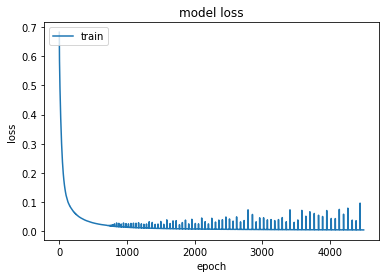

Procedure I
Statement  7:    1
Statement  2:    2
Statement  3:    3
Statement  5:    4
Statement  9:    5
Statement  1:    6
Statement  8:    7
Statement  6:    8
Statement  4:    9
Procedure II (improvement)
Statement  3 should be checked firstly (Si)
Statement  6 should be checked firstly (Si)
Statement  7 should be checked secondly (Sm)
Statement  8 should be checked firstly (Si)
Final Result
Statement  3:    1
Statement  8:    2
Statement  6:    3
Statement  7:    4
Statement  2:    5
Statement  5:    6
Statement  9:    7
Statement  1:    8
Statement  4:    9


In [37]:
if __name__ == '__main__':
    inputstream = '../input/coverage.csv'
    n_statement = 9
    epochs = 4500
    m, result = get_train_data()
    #m, result,n_statement = read_coverage(inputstream)
    trained_model = train_model(m,result, n_statement,epochs)
    c_virtual = create_virtual_test(n_statement)
    r_virtual = trained_model.predict(c_virtual, batch_size=None, verbose=0, steps=None)
    procedure1(r_virtual)
    procedure2(r_virtual)